In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [64]:
import requests
req = requests.get("https://www.basketball-reference.com/leagues/NBA_2021_totals.html").content

Foi feito a leitura dos dados através da url utilizando a importação do ' requests '.

# Dados sem repetição


In [3]:
soup2 = BeautifulSoup(req, 'html.parser')

Este módulo define uma classe HTMLParser que serve como base para a análise de arquivos de texto formatados em HTML (HyperText Mark-up Language) e XHTML.

In [65]:
#Dados sem Retição

dados_sr = soup2.findAll('tr', class_= "full_table")
len(dados_sr)

540

Separando os dados encontrados no site, ' tr ' refere-se ao inicio da tabela e ' full_table ' aos dados não repetidos.

In [66]:
for tabela in dados_sr:
  for character in tabela:
    if(character.string == None):
      character.string = "0"

Foi criado  um 'for' para preencher com 0 os valores NA encontrados na tabela.

In [8]:
dados_sr[12].get_text(',')

'13,Kostas Antetokounmpo,PF,23,LAL,15,0,56,3,10,.300,0,0,0,3,10,.300,.300,6,13,.462,4,15,19,1,2,4,11,8,12'

Como o exemplo: o valor de 3P% de Kostas Antetokounmpo apor o primeiro .300 foi preenchido com 0.

In [67]:
dados_sr = [character.get_text(',').split(',') for character in dados_sr ]


In [10]:
titles = soup2.find('tr')
header = [id for id in titles.stripped_strings if id != '\n']
print(header)

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


Foi criado outro ' for ' para selecionar e separar cada valor da tabela, utilizando os comandos .get_text e .split, selecionando os textos do site e separando-os respectivamente. Agora é possível criar um DataFrame.

In [68]:
dados_sr = pd.DataFrame(dados_sr,  columns= header)
dados_sr.drop("Rk", axis=1, inplace = True)
dados_sr[0:5]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,.544,...,.509,73,135,208,29,20,28,43,91,304
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,.125,...,0,0,3,3,2,0,0,0,1,2
2,Steven Adams,C,27,NOP,58,58,1605,189,308,.614,...,.444,213,301,514,111,54,38,78,113,438
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,.570,...,.799,142,431,573,346,75,66,169,145,1197
4,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,.473,...,.872,19,99,118,49,11,29,27,47,352



# Dados com repetição

In [10]:
soup = BeautifulSoup(req, 'html.parser')
#soup.prettify()

In [11]:
#Dados com Retição

dados_cr = soup.findAll('tr', attrs={"class": ["italic_text partial_table", "full_table"]})
len(dados_cr)

705

Com repetição foi necessário inserir duas classes. Nota-se também que o tamanho da tabela foi 23.4% maior que a primeira.

In [12]:
for tabela in dados_cr:
  for character in tabela:
    if(character.string == None):
      character.string = "0"

In [13]:
dados_finais_cr = [ character.get_text(',').split(',') for character in dados_cr]

In [14]:
titles = soup.find('tr')
header = [id for id in titles.stripped_strings]
print(header)

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [15]:
dados_cr = pd.DataFrame(dados_finais_cr, columns= header)
#dados_cr.drop("Rk", axis=1, inplace = True)
dados_cr[0:5]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,...,.509,73,135,208,29,20,28,43,91,304
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,58,58,1605,189,308,...,.444,213,301,514,111,54,38,78,113,438
3,4,Bam Adebayo,C,23,MIA,64,64,2143,456,800,...,.799,142,431,573,346,75,66,169,145,1197
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,...,.872,19,99,118,49,11,29,27,47,352


# Análise exploratória sem repetição

In [12]:
names = dados_sr.columns
names

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [13]:
dados_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      540 non-null    object
 1   Player  540 non-null    object
 2   Pos     540 non-null    object
 3   Age     540 non-null    object
 4   Tm      540 non-null    object
 5   G       540 non-null    object
 6   GS      540 non-null    object
 7   MP      540 non-null    object
 8   FG      540 non-null    object
 9   FGA     540 non-null    object
 10  FG%     540 non-null    object
 11  3P      540 non-null    object
 12  3PA     540 non-null    object
 13  3P%     540 non-null    object
 14  2P      540 non-null    object
 15  2PA     540 non-null    object
 16  2P%     540 non-null    object
 17  eFG%    540 non-null    object
 18  FT      540 non-null    object
 19  FTA     540 non-null    object
 20  FT%     540 non-null    object
 21  ORB     540 non-null    object
 22  DRB     540 non-null    ob

In [18]:
#dados_srp['Age'] = dados_srp['Age'].apply(np.int64)
#dados_srp['PTS'] = dados_srp['PTS'].apply(np.int64)
#dados_srp['PTS'] = dados_srp['PTS'].apply(np.int64)
#dados_srp['MP'] = dados_srp['MP'].apply(np.int64)...

In [19]:
#import re
#for ind in dados_srp:
#  if re.match('^\d+$', dados_srp[ind][0]):
#    dados_srp[ind] = pd.to_numeric(dados_srp[ind])
#  elif re.match('^.\d+$', dados_srp[ind][0]):
#    print(2)
#    dados_srp[ind] = pd.to_numeric(dados_srp[ind])
#dados_srp.info()

In [77]:
import re
for ind in dados_sr:
  if re.match('^\d+$', dados_sr[ind][0]):
    dados_sr[ind] = pd.to_numeric(dados_sr[ind])
  elif re.match('^.\d+$', dados_sr[ind][0]):
    dados_sr[ind] = pd.to_numeric(dados_sr[ind])
dados_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     540 non-null    int64  
 1   G       540 non-null    int64  
 2   GS      540 non-null    int64  
 3   MP      540 non-null    int64  
 4   FG      540 non-null    int64  
 5   FGA     540 non-null    int64  
 6   FG%     540 non-null    float64
 7   3P      540 non-null    int64  
 8   3PA     540 non-null    int64  
 9   3P%     540 non-null    float64
 10  2P      540 non-null    int64  
 11  2PA     540 non-null    int64  
 12  2P%     540 non-null    float64
 13  eFG%    540 non-null    float64
 14  FT      540 non-null    int64  
 15  FTA     540 non-null    int64  
 16  FT%     540 non-null    float64
 17  ORB     540 non-null    int64  
 18  DRB     540 non-null    int64  
 19  TRB     540 non-null    int64  
 20  AST     540 non-null    int64  
 21  STL     540 non-null    int64  
 22  BL

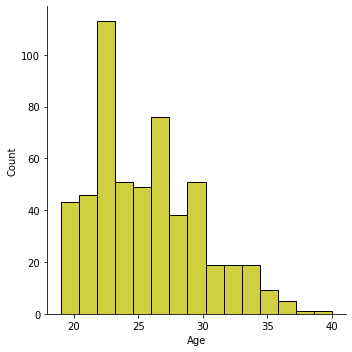

In [21]:
sns.displot(dados_sr['Age'].sort_values(),color="y");

É possível identificar pelo histograma que a maioria dos jogadores possuem a idade entre 22 e 26 anos.

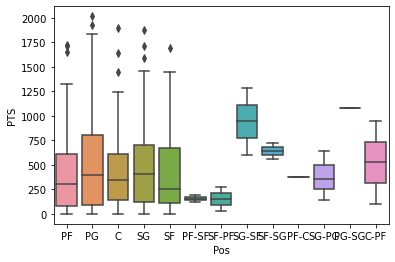

In [22]:
sns.boxplot(data = dados_sr, x = 'Pos', y = 'PTS');

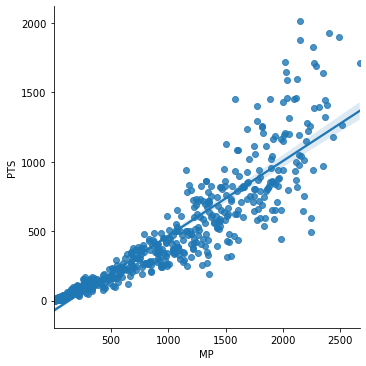

In [23]:
sns.lmplot(x = 'MP' ,y='PTS', data = dados_sr);

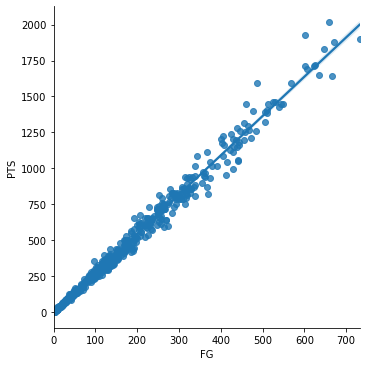

In [24]:
sns.lmplot(data = dados_sr, x = 'FG', y = 'PTS');

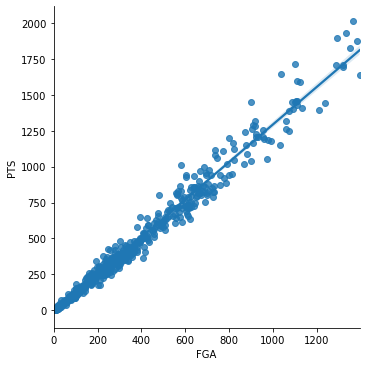

In [25]:
sns.lmplot(data = dados_sr, x = 'FGA', y = 'PTS');

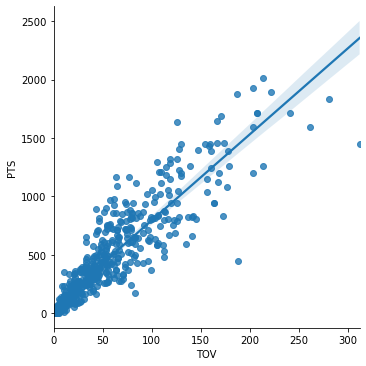

In [26]:
sns.lmplot(data = dados_sr, x = 'TOV', y = 'PTS');

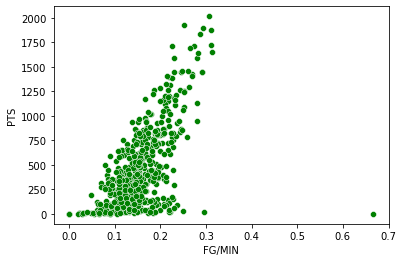

In [27]:
dados_sr['FG/MIN'] = dados_sr['FG'] / dados_sr['MP']
sns.scatterplot(data =  dados_sr, x = 'FG/MIN', y = 'PTS',color="g");

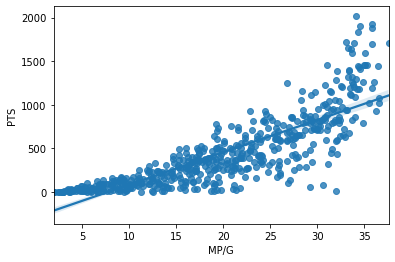

In [28]:
dados_sr['MP/G'] = dados_sr['MP'] / dados_sr['G']
sns.regplot(data = dados_sr, x = 'MP/G', y = 'PTS');

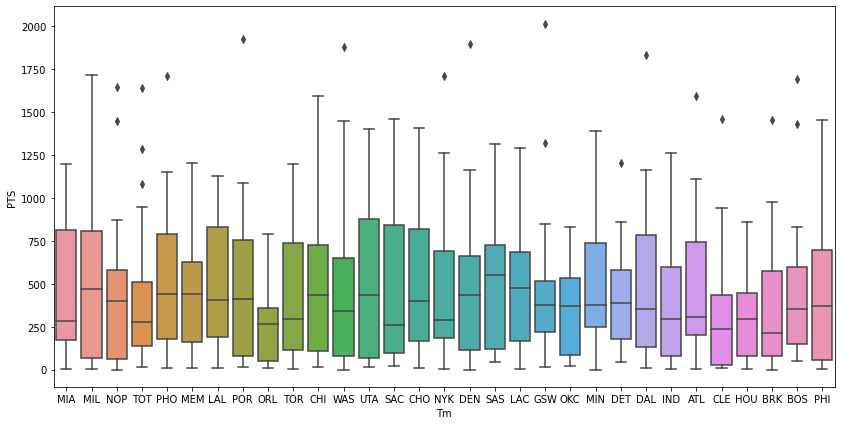

In [29]:
plt.figure(figsize = (14,7))
sns.boxplot(data = dados_sr, x = 'Tm', y = 'PTS');

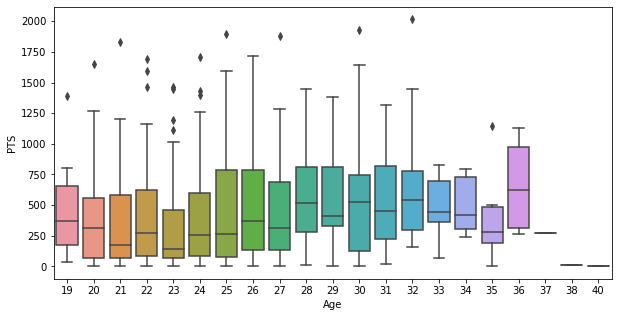

In [30]:
plt.figure(figsize = (10,5))
sns.boxplot(data = dados_sr, x = 'Age', y ='PTS');

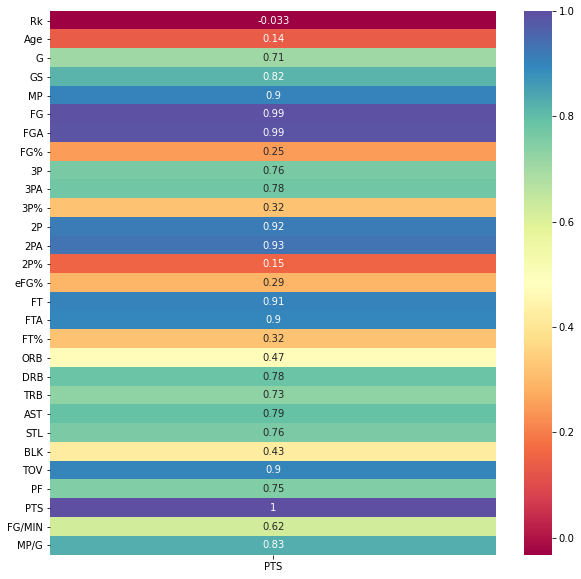

In [31]:
plt.figure(figsize = (10,10))
sns.heatmap(dados_sr.corr()['PTS'].to_frame(), annot = True,cmap="Spectral");

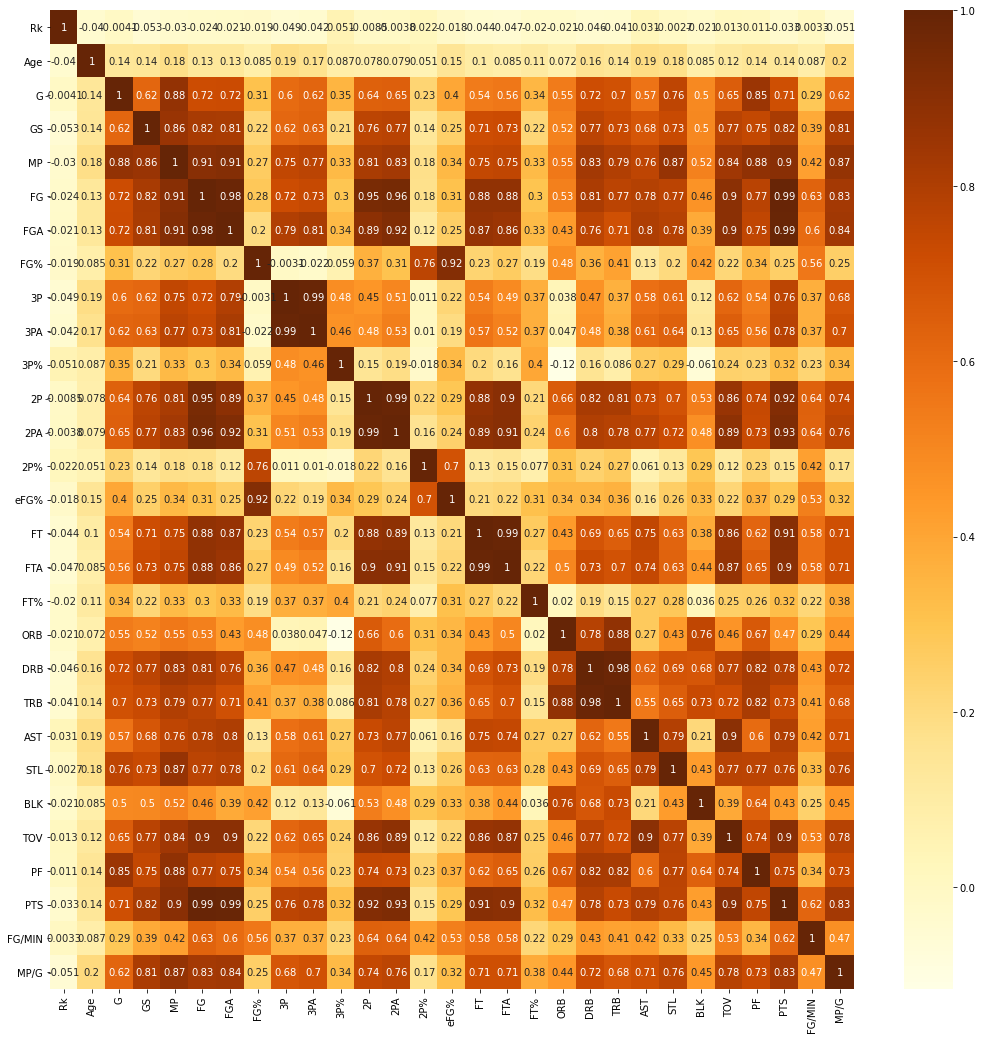

In [32]:
plt.figure(figsize = (18,18))
sns.heatmap(dados_sr.corr(), annot = True,cmap ="YlOrBr");

In [33]:
times = dados_sr['Tm'].unique()
times

array(['MIA', 'MIL', 'NOP', 'TOT', 'PHO', 'MEM', 'LAL', 'POR', 'ORL',
       'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'SAS',
       'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'CLE',
       'HOU', 'BRK', 'BOS', 'PHI'], dtype=object)

In [34]:
sep_times = dados_sr.groupby('Tm').groups
for time in sep_times:
  sep_times[time] = sum(sep_times[time])

valores = sep_times.values()
indice = sep_times.keys()
pt_por_time = pd.DataFrame(data = valores, index = indice)
pt_por_time.reset_index(inplace=True)
pt_por_time.columns = ['Time','Pontos']

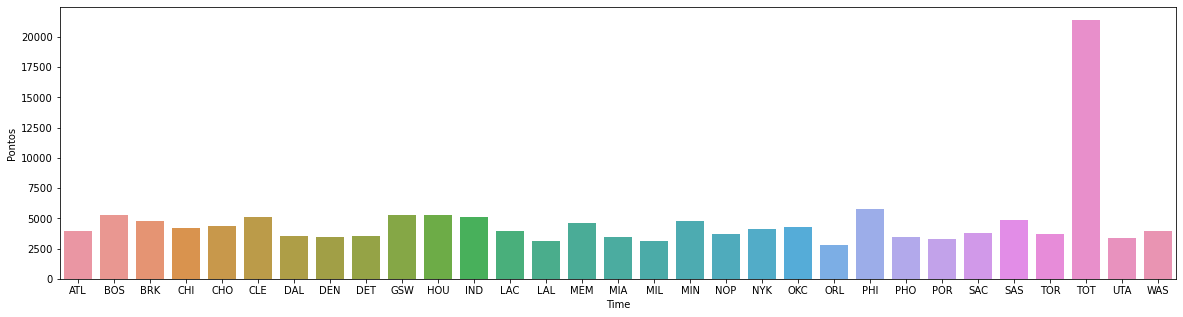

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
sns.barplot(x = pt_por_time['Time'],y=pt_por_time['Pontos']);

In [36]:
cont = 0
for i in dados_sr['Tm']:
  if i == 'TOT':
    cont+=1
cont

79

TIRAR AS LINHAS TOT's, TIRAR OS NOMES DOS JOGADORES, ESTUDAR E GERAR INSIGHTS,GERAR GRÁFICOS COMBINANDO FATORES. TIME APARENTEMENTE NÃO SÃO RELEVANTES.
AVALIAR: IDADE IMPORTA? POSIÇÃO IMPORTA? SE NÃO, DESCARTAR COLUNAS.

In [37]:
maiores_pontuadores = dados_sr['PTS'].nlargest(10)
maiores_pontuadores = maiores_pontuadores.reset_index()
lista = maiores_pontuadores['index'].to_list()
maiores_frame = dados_sr.loc[lista]
maiores_frame['PTP'] = str('nan')
maiores_frame.reset_index(inplace= True)
maiores_frame
for player in range( 0,len(maiores_frame)):
  maiores_frame.at[player,'PTP'] = maiores_frame.iloc[player]['Player'] + '\n' + maiores_frame.iloc[player]['Pos'] + '\n' + maiores_frame.iloc[player]['Tm']

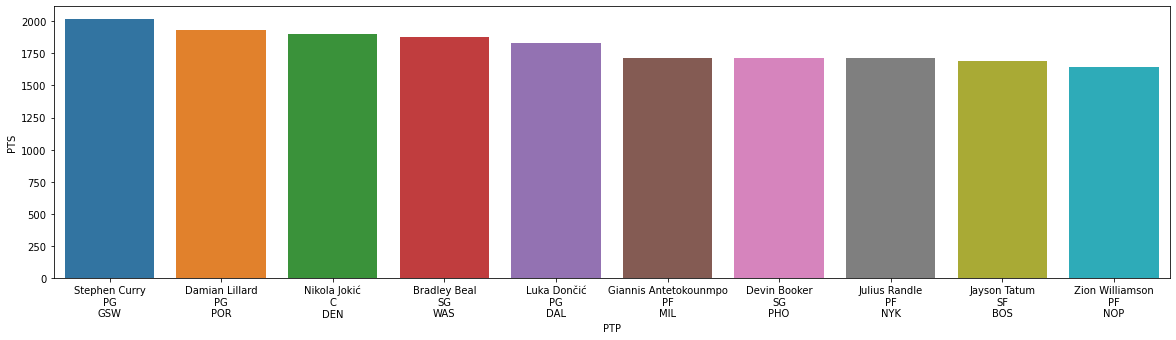

In [38]:
plt.figure(figsize = (20,5))
sns.barplot(data = maiores_frame, x = 'PTP', y = 'PTS');

In [39]:
dois_times = dados_sr[dados_sr['Tm'] == 'TOT']
dados_sr.drop(dois_times.reset_index()['index'], inplace = True)
plt.figure(figsize = (20,5))
# sns.barplot(x = pt_por_time['Time'],y=pt_por_time['Pontos']);

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

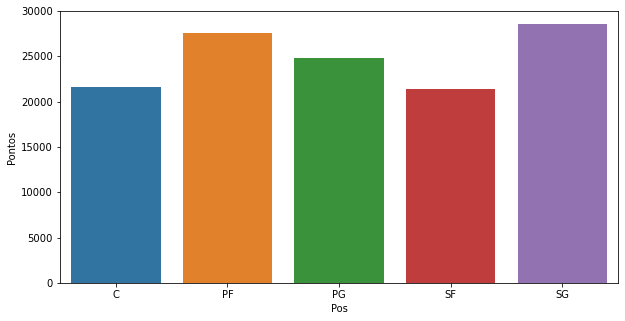

In [40]:
sep_pos = dados_sr.groupby('Pos').groups
for pos in sep_pos:
  sep_pos[pos] = sum(sep_pos[pos])

valores = sep_pos.values()
indice = sep_pos.keys()
pt_por_pos = pd.DataFrame(data = valores, index = indice)
pt_por_pos.reset_index(inplace=True)
pt_por_pos.columns = ['Pos','Pontos']

plt.figure(figsize = (10,5))
sns.barplot(x = pt_por_pos['Pos'],y=pt_por_pos['Pontos']);

In [85]:
#dados_sr.drop('FGA',inplace = True, axis='columns')
dados_sr.drop('3PA',inplace = True, axis='columns')
dados_sr.drop('3P',inplace = True, axis='columns')
dados_sr.drop('2P',inplace = True, axis='columns')
dados_sr.drop('2PA',inplace = True, axis='columns')
dados_sr.drop('FT',inplace = True, axis='columns')
dados_sr.drop('FTA',inplace = True, axis='columns')
#dados_sr.drop('Rk',inplace = True, axis='columns')
dados_sr.drop('FG',inplace = True, axis='columns')

KeyError: "['3PA'] not found in axis"

In [42]:
dados_sr.drop('FG/MIN',inplace = True, axis='columns')
dados_sr.drop('MP/G',inplace = True, axis='columns')

In [43]:
dados_sr.corr().style.background_gradient(cmap='BrBG').set_precision(2)
# 'RdBu_r' & 'coolwarm' are other good diverging colormaps

,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.00,0.14,0.17,0.20,0.11,0.08,0.07,0.18,0.08,0.10,0.18,0.17,0.19,0.18,0.10,0.12,0.16,0.15
G,0.14,1.00,0.63,0.88,0.32,0.39,0.23,0.41,0.35,0.55,0.73,0.71,0.57,0.76,0.50,0.65,0.86,0.71
GS,0.17,0.63,1.00,0.86,0.22,0.23,0.13,0.25,0.24,0.51,0.76,0.73,0.69,0.74,0.49,0.78,0.75,0.82
MP,0.20,0.88,0.86,1.00,0.28,0.37,0.18,0.35,0.34,0.55,0.84,0.80,0.76,0.87,0.52,0.84,0.89,0.90
FG%,0.11,0.32,0.22,0.28,1.00,0.06,0.76,0.92,0.21,0.48,0.37,0.42,0.14,0.22,0.40,0.22,0.35,0.25
3P%,0.08,0.39,0.23,0.37,0.06,1.00,-0.02,0.35,0.41,-0.10,0.18,0.11,0.29,0.31,-0.04,0.27,0.27,0.35
2P%,0.07,0.23,0.13,0.18,0.76,-0.02,1.00,0.69,0.10,0.30,0.24,0.27,0.07,0.13,0.27,0.12,0.23,0.15
eFG%,0.18,0.41,0.25,0.35,0.92,0.35,0.69,1.00,0.33,0.34,0.35,0.36,0.16,0.27,0.32,0.22,0.37,0.29
FT%,0.08,0.35,0.24,0.34,0.21,0.41,0.10,0.33,1.00,0.03,0.21,0.17,0.27,0.29,0.05,0.26,0.27,0.33
ORB,0.10,0.55,0.51,0.55,0.48,-0.10,0.30,0.34,0.03,1.00,0.78,0.88,0.28,0.43,0.75,0.45,0.68,0.47


In [44]:
dados_sr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 539
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  461 non-null    object 
 1   Pos     461 non-null    object 
 2   Age     461 non-null    int64  
 3   Tm      461 non-null    object 
 4   G       461 non-null    int64  
 5   GS      461 non-null    int64  
 6   MP      461 non-null    int64  
 7   FG%     461 non-null    float64
 8   3P%     461 non-null    float64
 9   2P%     461 non-null    float64
 10  eFG%    461 non-null    float64
 11  FT%     461 non-null    float64
 12  ORB     461 non-null    int64  
 13  DRB     461 non-null    int64  
 14  TRB     461 non-null    int64  
 15  AST     461 non-null    int64  
 16  STL     461 non-null    int64  
 17  BLK     461 non-null    int64  
 18  TOV     461 non-null    int64  
 19  PF      461 non-null    int64  
 20  PTS     461 non-null    int64  
dtypes: float64(5), int64(13), object(3)
mem

In [ ]:
dados_sr

In [73]:
dados_sr.drop('Player',inplace = True, axis='columns')
dados_sr.drop('Pos',inplace = True, axis='columns')
dados_sr.drop('Tm',inplace = True, axis='columns')

In [23]:
dados_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      540 non-null    int64  
 1   Age     540 non-null    int64  
 2   G       540 non-null    int64  
 3   GS      540 non-null    int64  
 4   MP      540 non-null    int64  
 5   FG      540 non-null    int64  
 6   FGA     540 non-null    int64  
 7   FG%     540 non-null    float64
 8   3P      540 non-null    int64  
 9   3PA     540 non-null    int64  
 10  3P%     540 non-null    float64
 11  2P      540 non-null    int64  
 12  2PA     540 non-null    int64  
 13  2P%     540 non-null    float64
 14  eFG%    540 non-null    float64
 15  FT      540 non-null    int64  
 16  FTA     540 non-null    int64  
 17  FT%     540 non-null    float64
 18  ORB     540 non-null    int64  
 19  DRB     540 non-null    int64  
 20  TRB     540 non-null    int64  
 21  AST     540 non-null    int64  
 22  ST

In [74]:
dados_sr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,21,61,4,737,124,228,.544,0,1,.000,...,.509,73,135,208,29,20,28,43,91,304
1,24,7,0,18,1,8,.125,0,2,.000,...,0,0,3,3,2,0,0,0,1,2
2,27,58,58,1605,189,308,.614,0,3,.000,...,.444,213,301,514,111,54,38,78,113,438
3,23,64,64,2143,456,800,.570,2,8,.250,...,.799,142,431,573,346,75,66,169,145,1197
4,35,26,23,674,140,296,.473,31,80,.388,...,.872,19,99,118,49,11,29,27,47,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,28,63,39,1748,240,518,.463,64,172,.372,...,.802,65,204,269,278,101,30,83,75,645
536,32,68,23,1652,370,662,.559,12,45,.267,...,.628,168,255,423,291,74,40,137,152,823
537,22,63,63,2125,487,1112,.438,136,397,.343,...,.886,38,207,245,594,53,12,261,111,1594
538,28,48,21,1005,181,324,.559,4,28,.143,...,.714,119,209,328,86,27,17,51,121,451


# Treinando modelos 

In [24]:
X = dados_sr.iloc[:, :-1].values
y = dados_sr.iloc[:, -1].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size = 0.3)

In [16]:
X_train.shape

(378, 29)

In [17]:
X_test.shape

(162, 29)

In [25]:
from sklearn import svm
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.006172839506172839

In [133]:
from sklearn.ensemble import RandomForestClassifier

rdclassifier = RandomForestClassifier()
rdclassifier.fit(X_train, y_train)
rdclassifier.score(X_test, y_test)

0.006172839506172839

In [134]:
print(rdclassifier.feature_importances_)

[0.05105969 0.05477506 0.04265832 0.06441108 0.07026427 0.05543375
 0.0553345  0.05944783 0.05653455 0.05557455 0.0516552  0.05670614
 0.05255893 0.05725197 0.0511907  0.05076518 0.05618357 0.05819471]


In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

1.0

In [28]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear')
LRclassifier.fit(X_train, y_train)
LRclassifier.score(X_test, y_test)

C:\Users\marki\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.006172839506172839

In [173]:
from sklearn.neighbors import KNeighborsClassifier

KNclassifier = KNeighborsClassifier(n_neighbors=8)
KNclassifier.fit(X_train, y_train)
KNclassifier.score(X_test, y_test)

0.007194244604316547

In [174]:
from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)
DTclassifier.score(X_test, y_test)

0.007194244604316547

In [175]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)
NBclassifier.score(X_test, y_test)

0.007194244604316547

# Gridsearch 


In [32]:
from sklearn.model_selection import GridSearchCV

 # Random forest 

In [101]:
# Number of trees in random forest - gerar 10 números de 1 a 80.
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [142]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [1, 2], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [145]:
rf_Grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X, y)
rf_Grid.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


C:\Users\marki\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 out of 192 | elapsed:    0.4s finished


{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2}

In [146]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.075
Test Accuracy - : 0.079


# KNeighborsRegressor

In [121]:
X = dados_sr.iloc[:, :-1].values
y = dados_sr.iloc[:, -1].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size = 0.3)

In [122]:
from sklearn.neighbors import KNeighborsRegressor
KNclassifier = KNeighborsRegressor()
KNclassifier.fit(X_train, y_train)
KNclassifier.score(X_test, y_test)

0.9549171554218747

In [123]:
parametros = {'n_neighbors': [3,5,7,12,20,50,100]}

modelo = GridSearchCV(KNeighborsRegressor(),parametros)
modelo.fit(X, y)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 12, 20, 50, 100]})

In [124]:
# modelo.cv_results_
modelo.best_estimator_

KNeighborsRegressor(n_neighbors=3)

In [114]:
# Parametros do grid 
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(param_grid)

{'n_estimators': [1, 2], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [125]:
KNclassifier = KNeighborsRegressor(n_neighbors=3)
KNclassifier.fit(X_train, y_train)
KNclassifier.score(X_test, y_test)

0.9537534104313651

In [126]:
X_train.shape

(378, 18)

# Predição 

In [127]:
print(modelo.predict([[ 21,  61,   4,  737,  124,  0.544,  0.0,  0.546,  0.544,  0.509,   73,  135,  208,   29, 20,   28,   43,  91 ]]))

[305.]


In [129]:
dados_sr.head(1)

,Age,G,GS,MP,FG,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,21,61,4,737,124,0.544,0.0,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [116]:
 dados_sr.iloc[:, -1]

0       304
1         2
2       438
3      1197
4       352
       ... 
535     645
536     823
537    1594
538     451
539     650
Name: PTS, Length: 540, dtype: int64

In [86]:
for col in dados_sr.columns:
    print(col)

Age
G
GS
MP
FG
FG%
3P%
2P%
eFG%
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


In [130]:
print(modelo.feature_importances_)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'